# Project 1 Used car price prediction

The purpose of the project is to identify the factors(Independent variables) affecting the price of an used car. 
Make a machine learning model to predict the price of the used car. 
Train and test your model and identify the parameters of the model. 
Improve your model using other algorithams.
Finalize a model which can predict the price with much accuracy and efficiency. 
Interpret your results. 

In [1]:
import pandas as pd 
import numpy as np

In [2]:
cars=pd.read_csv("F:\\used_cars_data.csv")

In [3]:
df=cars.copy()

In [4]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
df.shape

(7253, 14)

the dataset has 7253 Observations and 14 variables. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


Mileage, engine, power and new_price are quantitative variables but are of object dtype here and needs to to converted to numeric and each value has suffix like kmpl/cc/bhp whic is the unit of measurment. we need to remove that before changing it to a quantitative variable. Some of the categorical variables like Location, Fuel_Type, Transmission and Owner_Type are also considered here as object data type. so we need to change those values to categorical data type.

In [7]:
df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [8]:
df["Location"].unique().tolist() # making a list of all the unique values in column location of the dataframe df

['Mumbai',
 'Pune',
 'Chennai',
 'Coimbatore',
 'Hyderabad',
 'Jaipur',
 'Kochi',
 'Kolkata',
 'Delhi',
 'Bangalore',
 'Ahmedabad']

In [9]:
df["Location"].isnull().sum() # sum of count of all the missing values in the column location of the dataframe df

0

we need to check nature of unique values of each variable which is categorical. 
need to check the total number of missing values in each variable and the percent of that too.
for that we can use for loop to find the unique values and missing values.

In [10]:
# Making a list of all categorical variables
cat_col = ["Location","Year","Fuel_Type","Transmission","Owner_Type","Seats"]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(cars[column].value_counts())

Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: count, dtype: int64
Year
2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
2008    207
2007    148
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2001      8
2000      5
1998      4
1999      2
1996      1
Name: count, dtype: int64
Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: count, dtype: int64
Transmission
Manual       5204
Automatic    2049
Name: count, dtype: int64
Owner_Type
First             5952
Second            1152
Third              137
Fourth & Above      12
Name: count, dtype: int64
Seats
5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: count,

Mumbai has highest numbers of car availabe for purchase and Hyderabad stands second. there are total of 11 locations in which
cars are available for purchase.
There are 23 distinct year values ranging from 1996-2019.
Maximum number of cars being sold/available have fuel type as Diesel. there are 5 distinct categories in Fuel_Type.
All the cars have either manual transmission or automatic transmission. Most of them are from manual transmission.
Most of the cares are First Owner_Type. there are 4 categories in Owner_Type.
Cars having 5 seats are the majority. 9 categories in Seats variable. One category is 0 which is not possible. we will deal with
that after we dealt with missing values.


In [11]:
df1=df.isnull().sum().sort_values(ascending=False)
df1

New_Price            6247
Price                1234
Seats                  53
Engine                 46
Power                  46
Mileage                 2
S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64

In [12]:
missing_percent=round(df.isna().sum()/df.isna().count()*100.2).sort_values(ascending=False)
missing_percent

New_Price            86.0
Price                17.0
Engine                1.0
Power                 1.0
Seats                 1.0
S.No.                 0.0
Name                  0.0
Location              0.0
Year                  0.0
Kilometers_Driven     0.0
Fuel_Type             0.0
Transmission          0.0
Owner_Type            0.0
Mileage               0.0
dtype: float64

In [13]:
df1=pd.DataFrame(df1)

<BarContainer object of 14 artists>

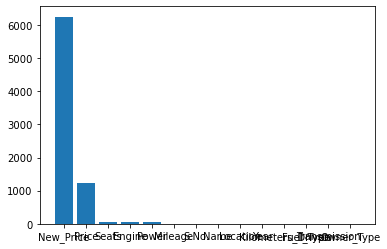

In [14]:
import matplotlib.pyplot as plt
plt.bar(df1.index,df1[0])

86 percentage of the missing values are from variable New_price. Price also has a sustantial amount of missing values.
Seats, Engine, Power are the other variables which has significant amount of missing values.
Mileage has two missing values.

# Dealing with 3 variables Engine, Mileage, Power

In [15]:
df[['Engine','Power','Mileage']].sample(10)

,Engine,Power,Mileage
4082,1199 CC,73.9 bhp,22.07 kmpl
1958,1582 CC,126.32 bhp,22.32 kmpl
5485,1198 CC,86.7 bhp,18.0 kmpl
3134,1199 CC,74 bhp,16.2 kmpl
4334,1197 CC,81.86 bhp,18.9 kmpl
945,1582 CC,126.24 bhp,22.7 kmpl
2919,1598 CC,103.6 bhp,20.54 kmpl
4553,1591 CC,121.3 bhp,13.0 kmpl
7214,1396 CC,88.73 bhp,21.19 kmpl
2498,1799 CC,130.2 bhp,14.8 kmpl


# Handling Mileage variable

In [16]:
df['Fuel_Type'].unique().tolist()

['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric']

In [17]:
typeoffuel=['CNG','LPG']
df.loc[df.Fuel_Type.isin(typeoffuel)].head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
127,127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,3.25
328,328,Maruti Zen Estilo LXI Green (CNG),Pune,2008,42496,CNG,Manual,First,26.3 km/kg,998 CC,67.1 bhp,5.0,NaN,1.40
440,440,Maruti Eeco 5 STR With AC Plus HTR CNG,Kochi,2017,31841,CNG,Manual,First,15.1 km/kg,1196 CC,73 bhp,5.0,NaN,4.70


some of the mileage values have unit of measurment km/kg instead of km/ltr. since both the units are in km, no 
need to convert the vaues. but need to remove the unit of measurment and then change it to a quantitative variable.


In [18]:
df["Mileage"] = df["Mileage"].str.rstrip(" kmpl") ## removing kmpl & km/g from mileage variable observations
df["Mileage"] = df["Mileage"].str.rstrip(" km/g")

In [19]:
df[df.Mileage.isnull()==True] ## mileage variable has two zero observations

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75


In [20]:
df.query("Mileage == '0.0'")['Mileage'].count()

81

In [21]:
df.loc[df["Mileage"]=='0.0','Mileage']=np.nan

There are total of 83 missing values found in mileage variable. changing it to nan values and deal with them later

# Handling Power variable

In [22]:
df["Power"] = df["Power"].str.rstrip("bhp") ## removing kmpl & km/g from mileage variable observations

In [23]:
df[['Engine','Power','Mileage']].sample(50)

,Engine,Power,Mileage
3668,1197 CC,78.9,20.36
3228,796 CC,37,16.1
4885,1197 CC,81.83,18.6
552,1298 CC,85.8,17.5
6089,1373 CC,93.7,16.02
7111,1399 CC,98.82,13.7
5750,1461 CC,83.8,20.45
3833,1591 CC,121.3,17.01
2898,1968 CC,140,16.55
6701,1498 CC,98.6,24.5


Power variable has some null values. 

In [24]:
df[df.Power.isnull()==True]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,NaN,NaN,NaN,NaN,NaN,2.95
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,2.11
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,NaN,NaN,NaN,NaN,1.75
749,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,NaN,NaN,NaN,NaN,NaN,26.50
1294,1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8,NaN,NaN,NaN,NaN,3.20
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,5.80
1385,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,NaN,NaN,NaN,NaN,NaN,1.50
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,NaN,NaN,NaN,NaN,NaN,40.88
2074,2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,3.15
2096,2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,NaN,NaN,NaN,NaN,NaN,1.93


In [25]:
df['Power'].isna().sum()

46

In [26]:
df.query("Power == 'null '")['Power'].count()

129

In [27]:
df["Power"]= df["Power"].replace(regex="null ", value = np.nan)

In [28]:
df['Power'].isna().sum()

175

There are total of 175 missing values found in Power variable and deal with them later

# Handling with engine variable

In [29]:
df['Engine']=df['Engine'].str.rstrip(' CC')

In [30]:
df.query("Power == '0.0'")['Power'].count()

0

In [31]:
df['Engine'].isna().sum()

46

There are total of 46 missing values found in Engine variable and deal with them later


# Processing Seats

In [32]:
df['Seats'].isna().sum()

53

In [33]:
df.query("Seats == 0.0 ")['Seats']

3999    0.0
Name: Seats, dtype: float64

In [34]:
#seats cannot be 0 so changing it to nan and will be handled in missing value
df.loc[3999,'Seats'] =np.nan

In [35]:
df['Seats'].isna().sum()

54

There are total of 54 missing values found in Seats variable and deal with them later

# Processing New_Price

In [36]:
df['New_Price'].sample(50)

4271           NaN
5648           NaN
3728           NaN
515            NaN
3690           NaN
6821     67.1 Lakh
4166           NaN
3096           NaN
5415     8.13 Lakh
1309           NaN
3753           NaN
3851           NaN
1006           NaN
3972           NaN
1533           NaN
2948           NaN
1258           NaN
3139           NaN
4248           NaN
5740           NaN
3979           NaN
1802           NaN
3071           NaN
7178           NaN
2570           NaN
1899           NaN
6432    15.57 Lakh
4406           NaN
5583           NaN
6109           NaN
6860           NaN
3679           NaN
4275           NaN
3502           NaN
1872     4.71 Lakh
2433           NaN
6418           NaN
2881           NaN
3079           NaN
251            NaN
333            NaN
6508           NaN
6897     5.51 Lakh
5241    11.27 Lakh
2070           NaN
5270           NaN
727            NaN
3867           NaN
5359     8.23 Lakh
2167           NaN
Name: New_Price, dtype: object

New_Price has some values in lakhs and some in crores

In [37]:
# Create a new column after splitting the New_Price values.
import re

new_price_num = []

# Regex for numeric + " " + "Lakh"  format
regex_power = "^\d+(\.\d+)? Lakh$"

for observation in df["New_Price"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            new_price_num.append(float(observation.split(" ")[0]))
        else:
            # To detect if there are any observations in the column that do not follow [numeric + " " + "Lakh"]  format
            # that we see in the sample output
            print(
                "The value is in crores ",
                observation,
            )
    else:
        # If there are any missing values in the New_Price column, we add missing values to the new column
        new_price_num.append(np.nan)

The value is in crores  1.28 Cr
The value is in crores  1.04 Cr
The value is in crores  1 Cr
The value is in crores  1.04 Cr
The value is in crores  1.39 Cr
The value is in crores  1.02 Cr
The value is in crores  1.4 Cr
The value is in crores  1.06 Cr
The value is in crores  1.27 Cr
The value is in crores  1.13 Cr
The value is in crores  1.36 Cr
The value is in crores  1.66 Cr
The value is in crores  1.6 Cr
The value is in crores  1.28 Cr
The value is in crores  2.3 Cr
The value is in crores  1.71 Cr
The value is in crores  1.39 Cr
The value is in crores  1.58 Cr
The value is in crores  3.75 Cr
The value is in crores  1.06 Cr


In [38]:
new_price_num = []

for observation in df["New_Price"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            new_price_num.append(float(observation.split(" ")[0]))
        else:
            # Converting values in Crore to lakhs
            new_price_num.append(float(observation.split(" ")[0]) * 100)
    else:
        # If there are any missing values in the New_Price column, we add missing values to the new column
        new_price_num.append(np.nan)

# Add the new column to the data
df["new_price_num"] = new_price_num

# Checking the new dataframe
df.sample(50)  # Looks ok

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num
2098,2098,Hyundai Grand i10 1.2 Kappa Sportz,Ahmedabad,2015,20780,Petrol,Manual,First,18.9,1197,81.86,5.0,6.82 Lakh,4.30,6.82
2933,2933,Toyota Innova 2.5 G (Diesel) 8 Seater,Jaipur,2015,75000,Diesel,Manual,First,12.99,2494,100.6,8.0,NaN,11.75,NaN
687,687,Skoda Superb 1.8 TSI MT,Hyderabad,2010,53293,Petrol,Manual,First,13.14,1798,160,5.0,NaN,6.00,NaN
4033,4033,Ford Fiesta 1.4 Duratec ZXI,Hyderabad,2006,69000,Petrol,Manual,First,16.6,1388,68,5.0,NaN,2.15,NaN
1910,1910,Toyota Corolla H2,Delhi,2008,63000,Petrol,Manual,First,13.4,1794,125,5.0,NaN,2.05,NaN
5275,5275,Maruti Celerio VXI,Kochi,2015,60586,Petrol,Manual,First,23.1,998,67.04,5.0,NaN,4.11,NaN
5473,5473,Skoda Fabia 1.2 MPI Classic,Delhi,2009,65000,Petrol,Manual,Second,17.5,1198,70,5.0,NaN,1.40,NaN
7242,7242,Hyundai Grand i10 Asta Option,Kolkata,2015,39000,Petrol,Manual,First,18.9,1197,82,5.0,NaN,NaN,NaN
4361,4361,Skoda Rapid 1.5 TDI Ambition,Mumbai,2012,54500,Diesel,Manual,First,21.13,1498,108.4,5.0,13.72 Lakh,4.10,13.72
7146,7146,Hyundai Creta 1.6 CRDi SX,Jaipur,2015,65000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,NaN,NaN


In [39]:
df['new_price_num'].isna().sum()

6247

There are total of 6247 missing values found in new_price_num variable and deal with them later

converting year variable into Age of car by substracting the year from current year

In [40]:
df['Current_year']=2023
df['Age_of_car']=df['Current_year']-df['Year']
df.drop('Current_year',axis=1,inplace=True)
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Age_of_car
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,1.75,NaN,13
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.50,NaN,8
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61 Lakh,4.50,8.61,12
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.00,NaN,11
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,17.74,NaN,10


# Converting data type

In [41]:
#converting object data type to category data type
df["Fuel_Type"] = df["Fuel_Type"].astype("category")
df["Transmission"] = df["Transmission"].astype("category")
df["Owner_Type"] = df["Owner_Type"].astype("category")
df["Location"] = df["Location"].astype("category")

#converting datatype  
df["Mileage"] = df["Mileage"].astype(float)
df["Power"] = df["Power"].astype(float)
df["Engine"]=df["Engine"].astype(float)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7253 non-null   int64   
 1   Name               7253 non-null   object  
 2   Location           7253 non-null   category
 3   Year               7253 non-null   int64   
 4   Kilometers_Driven  7253 non-null   int64   
 5   Fuel_Type          7253 non-null   category
 6   Transmission       7253 non-null   category
 7   Owner_Type         7253 non-null   category
 8   Mileage            7170 non-null   float64 
 9   Engine             7207 non-null   float64 
 10  Power              7078 non-null   float64 
 11  Seats              7199 non-null   float64 
 12  New_Price          1006 non-null   object  
 13  Price              6019 non-null   float64 
 14  new_price_num      1006 non-null   float64 
 15  Age_of_car         7253 non-null   int64   
dtypes: cat

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.000,3626.00,5439.0000,7252.00
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7170.0,18.346527,4.157910,6.40,15.300,18.20,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7199.0,5.280456,0.809327,2.00,5.000,5.00,5.0000,10.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00
new_price_num,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Age_of_car,7253.0,9.634634,3.254421,4.00,7.000,9.00,12.0000,27.00


# Processing Name variable

Brands do play an important role in Car selection and Prices. So extracting brand names from the Name.

In [44]:
df['Name'].isnull().sum()

0

In [45]:
#As mentioned in dataset car name has Brand and model so extracting it ,This can help to fill missing values of price column
df['Brand'] = df['Name'].str.split(' ').str[0] #Separating Brand name from the Name
df['Model'] = df['Name'].str.split(' ').str[1] + df['Name'].str.split(' ').str[2]

In [46]:
df.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [47]:
col=['ISUZU','Isuzu','Mini','Land']
#correcting brand names
df[df.Brand.isin(col)].sample(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Age_of_car,Brand,Model
4755,4755,Land Rover Range Rover Evoque 2.0 TD4 HSE Dynamic,Hyderabad,2016,52000,Diesel,Automatic,First,15.68,1999.0,177.00,5.0,74.49 Lakh,42.00,74.49,7,Land,RoverRange
5518,5518,Mini Cooper 3 DOOR S,Kochi,2016,21110,Petrol,Automatic,First,17.44,1998.0,189.08,4.0,39.27 Lakh,28.95,39.27,7,Mini,Cooper3
311,311,Land Rover Range Rover HSE Dynamic,Delhi,2017,44000,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,NaN,44.00,NaN,6,Land,RoverRange
2900,2900,Isuzu MUX 4WD,Jaipur,2017,34429,Diesel,Automatic,First,13.80,2999.0,174.57,7.0,33.68 Lakh,20.00,33.68,6,Isuzu,MUX4WD
6919,6919,ISUZU D-MAX V-Cross 4X4,Jaipur,2017,290000,Diesel,Manual,First,12.40,2499.0,134.00,5.0,NaN,NaN,NaN,6,ISUZU,D-MAXV-Cross


Brand names like ISUZU and Isuzu are same and needs to be corrected. Land, Mini seems to be incorrect. So correcting brand names.

In [48]:
#changing brandnames
df.loc[df.Brand == 'ISUZU','Brand']='Isuzu'
df.loc[df.Brand=='Mini','Brand']='Mini Cooper'
df.loc[df.Brand=='Land','Brand']='Land Rover'
#cars['Brand']=cars["Brand"].astype("category")

In [49]:
df.Brand.nunique()

32

In [50]:
df.groupby(df.Brand).size().sort_values(ascending =False)

Brand
Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land Rover         67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini Cooper        31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Lamborghini         1
OpelCorsa           1
Hindustan           1
Smart               1
Ambassador          1
dtype: int64

There are 32 unique Brands in the dataset.Maruti brand is most available for purchase/Sold followed by Hyundai.

In [51]:
df.Model.isnull().sum()

1

In [52]:
#drop row with no model
df.dropna(subset=['Model'],axis=0,inplace=True)

In [53]:
df.Model.isnull().sum()

0

In [54]:
df.Model.nunique()

726

In [55]:
df.groupby(df.Model).size().nlargest(30)

Model
SwiftDzire      189
Grandi10        179
WagonR          178
Innova2.5       145
Verna1.6        127
City1.5         122
Cityi           115
Creta1.6        110
NewC-Class      110
3Series         109
SwiftVDI         96
5Series          86
i201.2           78
SantroXing       76
XUV500W8         75
i10Sportz        75
AmazeS           69
i10Magna         69
Alto800          63
CorollaAltis     63
FigoDiesel       61
Ecosport1.5      59
A42.0            56
AltoK10          56
VitaraBrezza     55
i20Asta          54
InnovaCrysta     53
i20Sportz        53
Duster110PS      51
Fortuner4x2      50
dtype: int64

There are 726 unique models and Swift Dzire is most popular Model.

In [56]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Age_of_car,Brand,Model
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,NaN,13,Maruti,WagonR
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,NaN,8,Hyundai,Creta1.6
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,8.61,12,Honda,JazzV
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,NaN,11,Maruti,ErtigaVDI
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,NaN,10,Audi,A4New


# EDA


# Quantitative variables

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7252.0,3625.525510,2093.659475,0.00,1812.750,3625.50,5438.2500,7252.00
Year,7252.0,2013.366520,3.253162,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7252.0,58700.262686,84433.480370,171.00,34000.000,53429.00,73000.0000,6500000.00
Mileage,7169.0,18.347106,4.157912,6.40,15.300,18.20,21.1000,33.54
Engine,7206.0,1616.605051,595.320408,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7077.0,112.768713,53.496523,34.20,75.000,94.00,138.1000,616.00
Seats,7198.0,5.280495,0.809376,2.00,5.000,5.00,5.0000,10.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00
new_price_num,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Age_of_car,7252.0,9.633480,3.253162,4.00,7.000,9.00,12.0000,27.00


In [58]:
import seaborn as sns

C:\Users\aniru\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


C:\Users\aniru\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


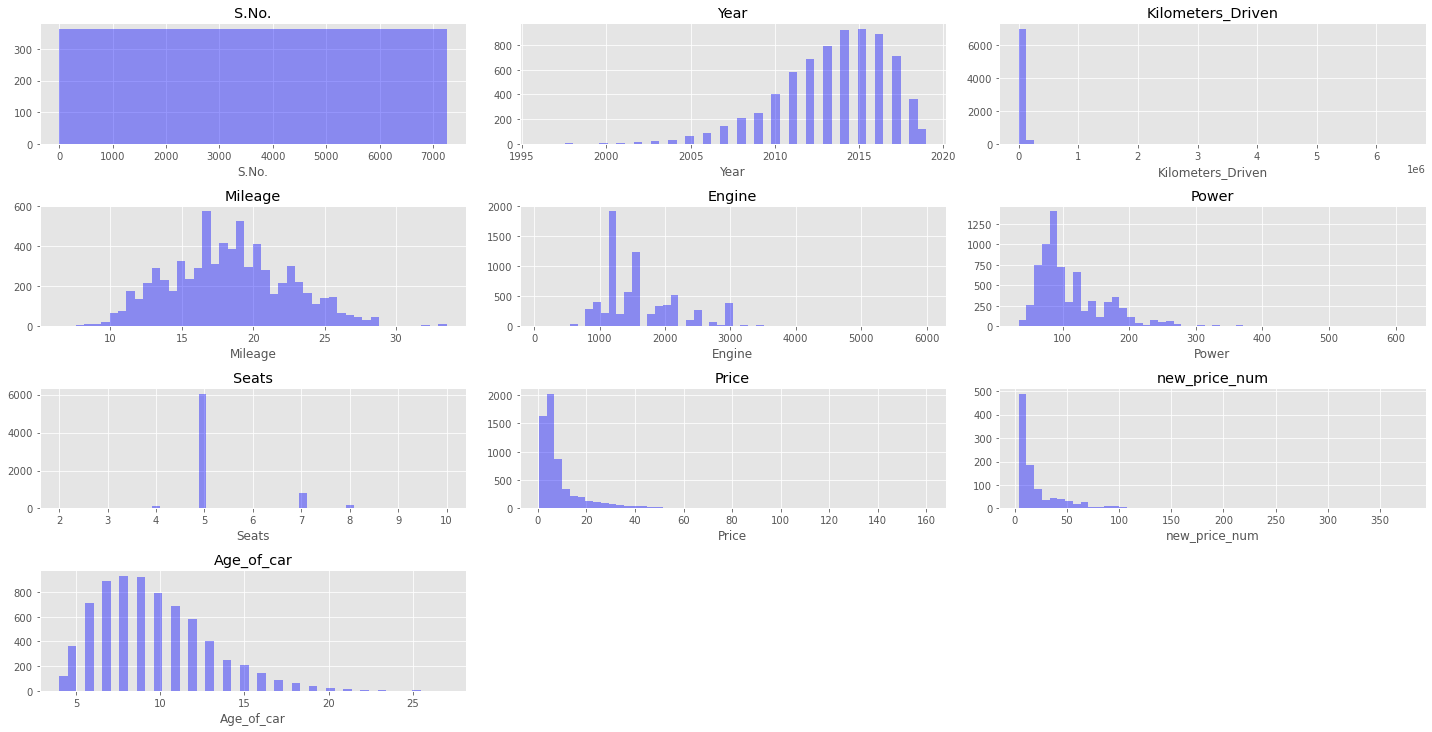

In [59]:
plt.style.use('ggplot')
#select all quantitative columns for checking the spread
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,25))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(10,3,i+1)
                       
                     sns.distplot(df[variable],kde=False,color='blue')
                     plt.tight_layout()
                     plt.title(variable)

In [60]:
df['Kilometers_Driven'].median()

53429.0

Kilometer driven , median is ~53k Km and mean is ~58K. Max values seems to be 6500000. This is very high , and seems to be outlier.

Mileage has an average of ~18 and a standerd deviation of ~4. the maximum value is inside 3 standard deviation from the mean. we can say it is almost normally distributed.

Engine is right skewed and has outliers on higher and lower end. has an average of ~1600 and standard deviation of ~595.

Power has an average of ~112 and a standard deviation of 53. and the distribution is right skewed.

Most of the cars are 5 seaters.

Distribution of price variable is also right skewed. Maximum value is 160 which seems to be an outlier.

Distribution of new_price_num variable is also right skewed with some outliers.

Age of the car variable is right skewed with the presenece of potential outliers. Car being sold/available for purchase are in 
4 - 27 years old


# Categorical variables

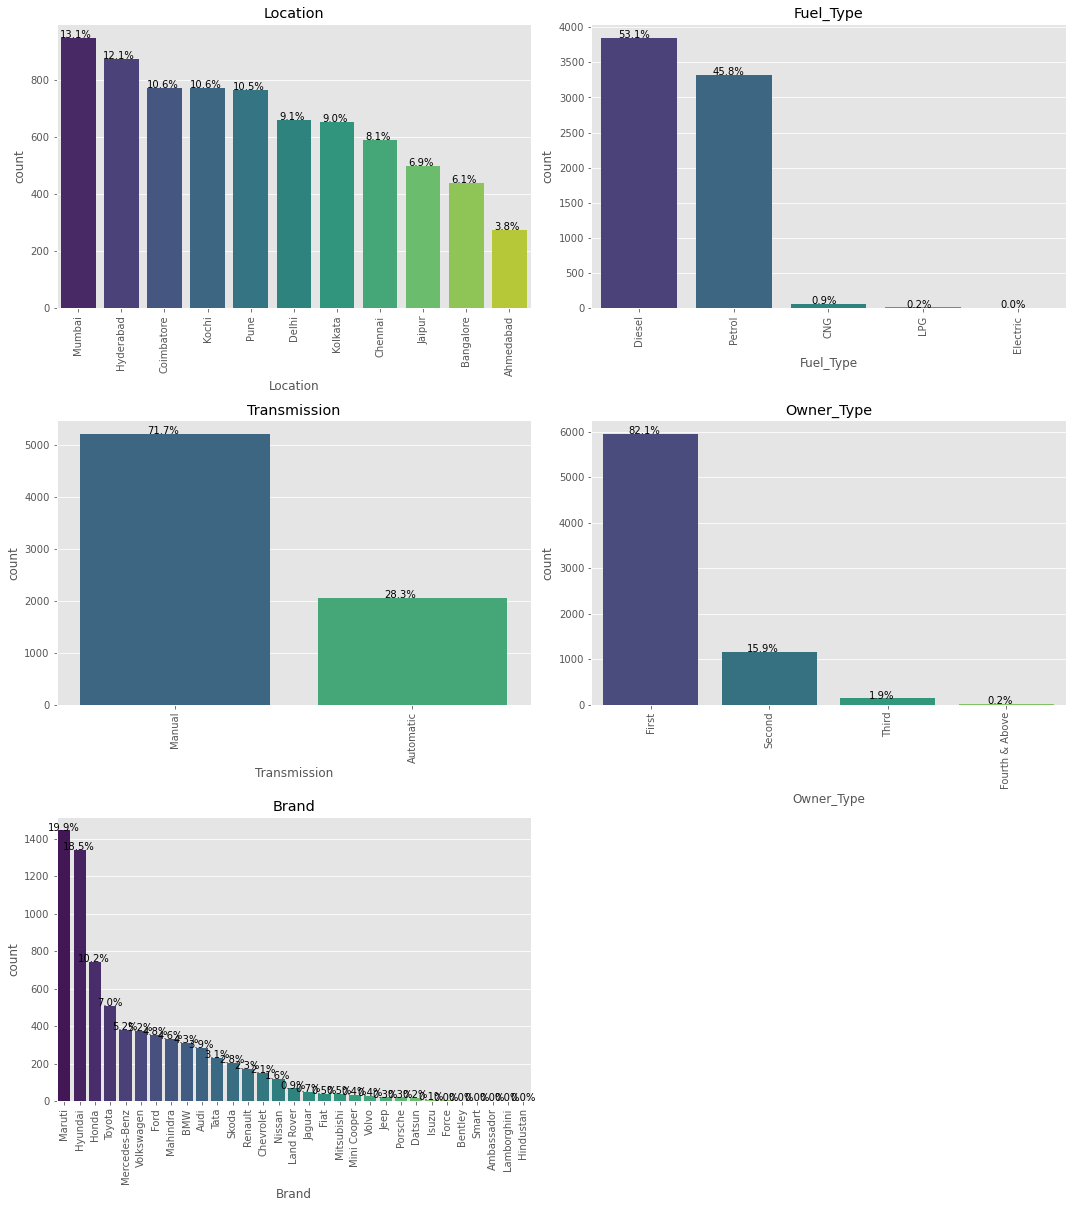

In [61]:
cat_columns=['Location','Fuel_Type','Transmission', 'Owner_Type', 'Brand'] #cars.select_dtypes(exclude=np.number).columns.tolist()

plt.figure(figsize=(15,21))

for i, variable in enumerate(cat_columns):
                     plt.subplot(4,2,i+1)
                     order = df[variable].value_counts(ascending=False).index    
                     ax=sns.countplot(x=df[variable], data=df , order=order ,palette='viridis')
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.xticks(rotation=90)
                     plt.tight_layout()
                     plt.title(variable)

Mumbai has highest numbers of car availabe for purchase whereas Ahmedabad has least

~53% of car being sold/avialable for purchase have fuel type as Diesel

~71 % cars available for sell have manual Transmission.

~82 % cars are First owned cars.

~39% of car available for sale are from Maruti & Hyundai brands.


# Handling missing values

In [62]:
df.isnull().sum().sort_values(ascending=False)

new_price_num        6246
New_Price            6246
Price                1233
Power                 175
Mileage                83
Seats                  54
Engine                 46
Brand                   0
Age_of_car              0
S.No.                   0
Name                    0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Model                   0
dtype: int64

In [63]:
# counting the number of missing values per row
num_missing = df.isnull().sum(axis=1)
num_missing.value_counts()

2    5025
3    1112
0     819
1     187
4      57
5      31
6      20
7       1
Name: count, dtype: int64

In [64]:
#Investigating how many missing values per row are there for each variable

for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print("*" *30,f'\nFor the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = df[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')

****************************** 
For the rows with exactly 1 missing values, NAs are found in:
Mileage      5
Price      182
dtype: int64



****************************** 
For the rows with exactly 2 missing values, NAs are found in:
New_Price        5025
new_price_num    5025
dtype: int64



****************************** 
For the rows with exactly 3 missing values, NAs are found in:
Mileage            25
Power              74
Seats               1
New_Price        1112
Price            1012
new_price_num    1112
dtype: int64



****************************** 
For the rows with exactly 4 missing values, NAs are found in:
Mileage          35
Power            50
Seats             6
New_Price        57
Price            23
new_price_num    57
dtype: int64



****************************** 
For the rows with exactly 5 missing values, NAs are found in:
Mileage           6
Engine           25
Power            30
Seats            26
New_Price        31
Price             6
new_price_num    31


In [65]:
df[num_missing==7]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Age_of_car,Brand,Model
6633,6633,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,Mahindra,TUV300


# Filling missing values in Mileage, Power and Engine variables

In [66]:
col=['Engine','Power','Mileage']
df[col].isnull().sum()

Engine      46
Power      175
Mileage     83
dtype: int64

In [67]:
df.groupby(['Name','Year'])['Engine'].median().head(10)

Name                                 Year
Ambassador Classic Nova Diesel       2003    1489.0
Audi A3 35 TDI Attraction            2014    1968.0
Audi A3 35 TDI Premium               2016    1968.0
Audi A3 35 TDI Premium Plus          2015    1968.0
                                     2016    1968.0
Audi A3 35 TDI Technology            2017    1968.0
Audi A4 1.8 TFSI                     2010    1781.0
                                     2011    1781.0
Audi A4 1.8 TFSI Technology Edition  2012    1798.0
Audi A4 2.0 TDI                      2009    1968.0
Name: Engine, dtype: float64

In [68]:
df['Engine'] = df.groupby(['Name', 'Year'])['Engine'].transform(lambda x: x.fillna(x.median()))

In [69]:
df.groupby(['Brand','Model'])['Engine'].median().head(10)

Brand       Model      
Ambassador  ClassicNova    1489.0
Audi        A335           1968.0
            A41.8          1781.0
            A42.0          1968.0
            A43.0          2967.0
            A43.2          3197.0
            A430           1395.0
            A435           1968.0
            A4New          1968.0
            A62.0          1968.0
Name: Engine, dtype: float64

In [70]:
df['Engine'] = df.groupby(['Brand', 'Model'])['Engine'].transform(lambda x: x.fillna(x.median()))

groupin the cars based on the year of manufacture and Name of the car and filling the values for engine variable using the median of each group.

chosing Median to fill the the missing value as there are many outliers,

filling Power and Mileage values using the same grouping

In [71]:
df['Power']=df.groupby(['Name','Year'])['Power'].transform(lambda x:x.fillna(x.median()))
df['Mileage']=df.groupby(['Name','Year'])['Mileage'].transform(lambda x:x.fillna(x.median()))

In [72]:
df['Power']=df.groupby(['Brand','Model'])['Power'].transform(lambda x:x.fillna(x.median()))
df['Mileage']=df.groupby(['Brand','Model'])['Mileage'].transform(lambda x:x.fillna(x.median()))

In [73]:
col=['Engine','Power','Mileage']
df[col].isnull().sum()

Engine     18
Power      63
Mileage    32
dtype: int64

In [74]:
df.groupby(['Model'])['Engine'].median().head(10)

Model
1000AC      970.0
1Series    1995.0
370ZAT     3696.0
3Series    1995.0
5Series    1995.0
6Series    2993.0
7Series    2993.0
800AC       796.0
800DX       796.0
800Std      796.0
Name: Engine, dtype: float64

In [75]:
df['Power']=df.groupby(['Model'])['Power'].transform(lambda x:x.fillna(x.median()))
df['Mileage']=df.groupby(['Model'])['Mileage'].transform(lambda x:x.fillna(x.median()))
df['Engine'] = df.groupby(['Model'])['Engine'].transform(lambda x: x.fillna(x.median()))

In [76]:
cols=['Engine','Power','Mileage']
df[cols].isnull().sum()

Engine     18
Power      63
Mileage    32
dtype: int64

In [77]:
for i in cols:
    df[i] = df[i].fillna(df[i].median())

In [78]:
cols=['Engine','Power','Mileage']
df[cols].isnull().sum()

Engine     0
Power      0
Mileage    0
dtype: int64

Filling missing values in Seats variable

Grouping with Name should give me more granularity, and near to accurate Seat values.

Grouping with Model should give me more granularity, and near to accurate Seat values.

In [79]:
df['Seats'].isnull().sum()

54

In [80]:
df['Seats']=df.groupby(['Name'])['Seats'].transform(lambda x:x.fillna(x.median()))
df['Seats']=df.groupby(['Model'])['Seats'].transform(lambda x:x.fillna(x.median()))


In [81]:
df['Seats'].isnull().sum()

23

In [82]:
df[df['Seats'].isnull()==True].head(20)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Age_of_car,Brand,Model
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1493.0,93.7,NaN,NaN,2.11,NaN,13,Maruti,Swift1.3
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1493.0,93.7,NaN,NaN,1.75,NaN,17,Maruti,Swift1.3
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1,1493.0,93.7,NaN,NaN,5.80,NaN,8,Maruti,Swift1.3
2074,2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1,1493.0,93.7,NaN,NaN,3.15,NaN,12,Maruti,Swift1.3
2325,2325,Maruti Swift 1.3 VXI ABS,Pune,2015,67000,Petrol,Manual,First,16.1,1493.0,93.7,NaN,NaN,4.70,NaN,8,Maruti,Swift1.3
2335,2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,1493.0,93.7,NaN,NaN,1.75,NaN,16,Maruti,Swift1.3
2369,2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061.0,93.7,NaN,NaN,1.50,NaN,15,Maruti,EstiloLXI
2668,2668,Maruti Swift 1.3 VXi,Kolkata,2014,32986,Petrol,Manual,First,16.1,1493.0,93.7,NaN,NaN,4.24,NaN,9,Maruti,Swift1.3
3404,3404,Maruti Swift 1.3 VXi,Jaipur,2006,125000,Petrol,Manual,Fourth & Above,16.1,1493.0,93.7,NaN,NaN,2.35,NaN,17,Maruti,Swift1.3
3810,3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.0,1493.0,93.7,NaN,NaN,11.99,NaN,10,Honda,CR-VAT


most of cars are 5 seater so filling the rest 23 by 5

In [83]:
df['Seats']=df['Seats'].fillna(5)

In [84]:
df['Seats'].isnull().sum()

0

In [85]:
df['Brand'] =df['Brand'].astype("category") # converting to categorical variable
df['Model'] =df['Model'].astype("category")

In [86]:
df.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            6246
Price                1233
new_price_num        6246
Age_of_car              0
Brand                   0
Model                   0
dtype: int64

# Processing New_Price variable

In [87]:
#For better granualarity grouping has done on Name and Year. filling with a median value brings it more near to real value
df['new_price_num']=df.groupby(['Name','Year'])['new_price_num'].transform(lambda x:x.fillna(x.median()))

In [88]:
df['new_price_num'].isna().sum()

6138

In [89]:
df['new_price_num']=df.groupby(['Name'])['new_price_num'].transform(lambda x:x.fillna(x.median()))

In [90]:
df['new_price_num'].isna().sum()

6019

In [91]:
df['new_price_num']=df.groupby(['Brand','Model'])['new_price_num'].transform(lambda x:x.fillna(x.median()))
df['new_price_num']=df.groupby(['Brand'])['new_price_num'].transform(lambda x:x.fillna(x.median()))

In [92]:
df['new_price_num'].isna().sum()

158

In [93]:
df.drop(['New_Price'],axis=1,inplace=True)

In [94]:
df.drop(['S.No.'],axis=1,inplace=True)

In [95]:
df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                1233
new_price_num         158
Age_of_car              0
Brand                   0
Model                   0
dtype: int64

In [106]:
df.groupby(['Brand'])['new_price_num'].agg({'median','mean','max'})

,max,mean,median
Brand,,,
Ambassador,NaN,NaN,NaN
Audi,128.00,53.951070,53.1400
BMW,166.00,62.985280,55.0700
Bentley,375.00,375.000000,375.0000
Chevrolet,NaN,NaN,NaN
Datsun,6.70,5.120882,4.9800
Fiat,9.50,8.663421,8.6250
Force,NaN,NaN,NaN
Ford,83.92,11.689744,11.4750


dropping remaining rows
cannot further fill this rows so dropping them



In [107]:
df.dropna(subset=['new_price_num'], inplace=True)

In [108]:
df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                1202
new_price_num           0
Age_of_car              0
Brand                   0
Model                   0
dtype: int64

In [109]:
df.shape

(7094, 16)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7094 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7094 non-null   object  
 1   Location           7094 non-null   category
 2   Year               7094 non-null   int64   
 3   Kilometers_Driven  7094 non-null   int64   
 4   Fuel_Type          7094 non-null   category
 5   Transmission       7094 non-null   category
 6   Owner_Type         7094 non-null   category
 7   Mileage            7094 non-null   float64 
 8   Engine             7094 non-null   float64 
 9   Power              7094 non-null   float64 
 10  Seats              7094 non-null   float64 
 11  Price              5892 non-null   float64 
 12  new_price_num      7094 non-null   float64 
 13  Age_of_car         7094 non-null   int64   
 14  Brand              7094 non-null   category
 15  Model              7094 non-null   category
dtypes: category

Only Price has NaN values and it is our target variable. we will not consider those rows for training data.

We have 6 categorical variables and 8 quantitative variables

# Feature selection and feature engineering

Purpose of this project is to predict the price of the car and find the relationship between the features and the target. 

This involves selection of features, Feature engineering and normalization of different features.

For achieving this we have to do Bivariate and Multivariate analysis

In [113]:
potential_features=df.columns.tolist()

In [114]:
potential_features

['Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price',
 'new_price_num',
 'Age_of_car',
 'Brand',
 'Model']

scatter plot between price and all other quantitative variables

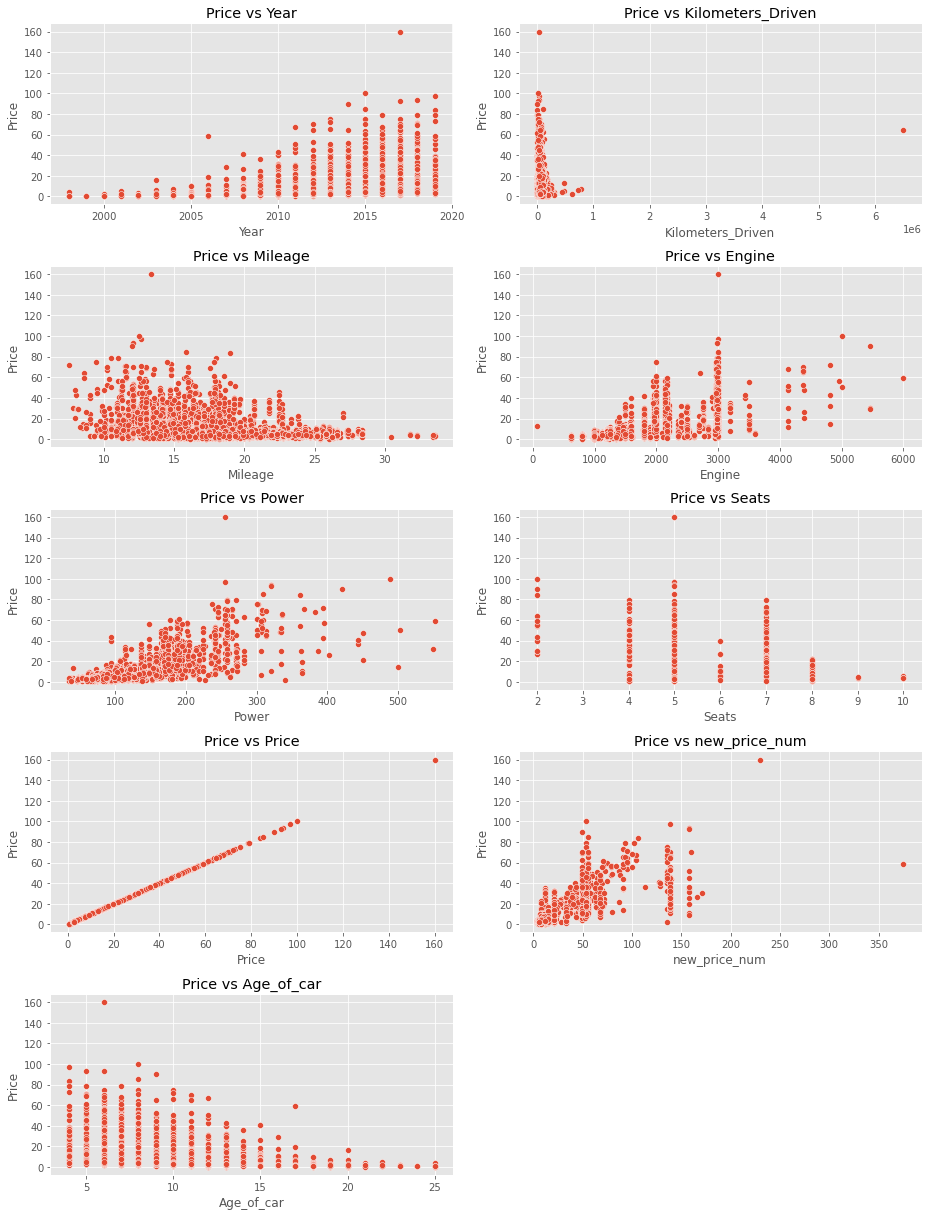

In [129]:
numeric_columns=df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(13,17))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,2,i+1)
                     sns.scatterplot(x=df[variable],y=df['Price']).set(title='Price vs '+ variable)
                     #plt.xticks(rotation=90)
                     plt.tight_layout()

In [130]:
df['Name']=df['Name'].astype('category')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7094 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7094 non-null   category
 1   Location           7094 non-null   category
 2   Year               7094 non-null   int64   
 3   Kilometers_Driven  7094 non-null   int64   
 4   Fuel_Type          7094 non-null   category
 5   Transmission       7094 non-null   category
 6   Owner_Type         7094 non-null   category
 7   Mileage            7094 non-null   float64 
 8   Engine             7094 non-null   float64 
 9   Power              7094 non-null   float64 
 10  Seats              7094 non-null   float64 
 11  Price              5892 non-null   float64 
 12  new_price_num      7094 non-null   float64 
 13  Age_of_car         7094 non-null   int64   
 14  Brand              7094 non-null   category
 15  Model              7094 non-null   category
dtypes: category

In [132]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [135]:
quant_var=df.select_dtypes(include=np.number)

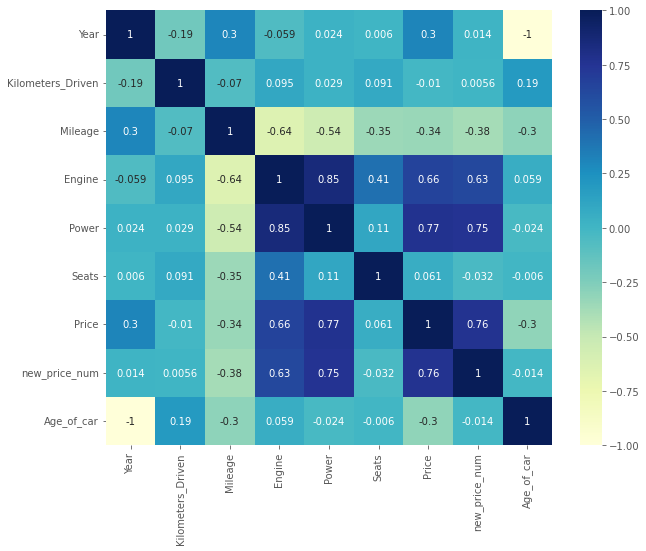

In [136]:
plt.figure(figsize=(10,8))
sns.heatmap(quant_var.corr(),annot=True ,cmap="YlGnBu" )
plt.show()

Engine has strong positive correlation to Power [0.85].

Price has positive correlation to Engine[0.66] as well Power [0.77].

Mileage is negative correlated to Engine,Power,Price.,Ageofcar

Price has negative correlation to age of car.

Kilometer driven doesnt impact Price